<img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://githubtocolab.com/vmcf-konfmi/MB100T01/blob/main/advanced_image_analysis_mb100t01/02_plotting/02_Using_Seaborn.ipynb">

# Using Seaborn to Plot Distributions

Sources and inspiration:


*   https://www.kaggle.com/code/tirendazacademy/penguin-dataset-data-visualization-with-seaborn#Penguin-Dataset:-Data-Visualization-with-Seaborn
*   https://seaborn.pydata.org/tutorial/categorical.html
* https://pandas.pydata.org/docs/user_guide/visualization.html
* https://levelup.gitconnected.com/statistics-on-seaborn-plots-with-statannotations-2bfce0394c00

If running this from Google Colab, uncomment the cell below and run it. Otherwise, just skip it.

In [ ]:
# !pip install watermark

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Brief Data Exploration with pandas

We can work with one of the `seaborn` training datasets *Penguins*

In [ ]:
penguins = sns.load_dataset("penguins")

`pandas` package can help us get some overview of the data.

In [ ]:
penguins.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000

Since `describe()` function works only with numers, we will need to look at the few first values, and search for unique strings in some of the columns.

In [ ]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [ ]:
penguins["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
penguins["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [ ]:
penguins["sex"].unique()

array(['Male', 'Female', nan], dtype=object)

Let's take a look at missing data (NaNs) with the `isnull()` method.

In [ ]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

We will want to drop all rows with unknown entries with `dropna()` function.

In [ ]:
penguins_cleaned = penguins.dropna()
penguins_cleaned.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Of course we can do a fast visualisation with `pandas`, but it is more useful for exploring the data than sharing the resulting charts.

<Axes: ylabel='count'>

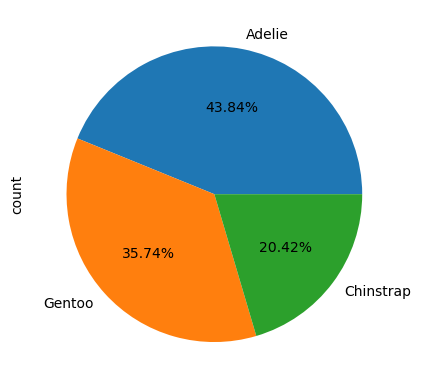

In [ ]:
Species=penguins_cleaned["species"].value_counts()
Species.plot(kind='pie',autopct="%.2f%%")

One of my favourite things about `seaborn` is that part of the documentations is a [Example Gallery](https://seaborn.pydata.org/examples/) where you can simply copy-paste the code for charts. But there is a catch! What is missing?

## Preparing charts for any occasion

### Setting the Theme and Color Pallet

We can use the `set_theme()` function which changes the global defaults for all plots using the matplotlib system. So we can presetup the style or color palettes for the rest of the notebook.

You can explore more in [Controlling figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html) or [Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html).

We can control figure size and some axes parameters by using `plt.subplots` from matplotlib to ave access to the `figure` and the `axes` objects.


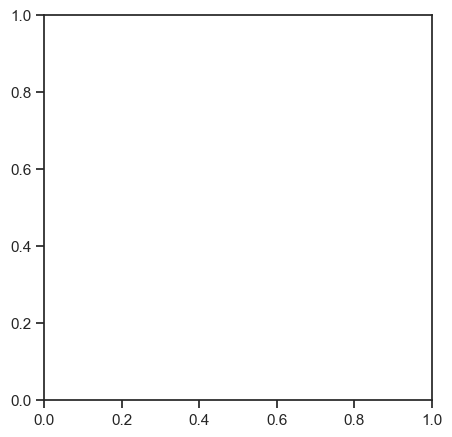

In [ ]:
# Apply the theme
sns.set_theme(style="ticks", palette="colorblind")
# sns.set_theme(style="white")
# sns.set_theme(style="dark")

# Set up the matplotlib figure
figure, axes = plt.subplots(figsize=(5, 5))

## Axes-level plots

Seaborn has 2 hierarchy level of plots: figure-level and axes-level.

A figure-level function, like `relplot`, generates the full figure and sets the axes inside it depending on the provided parameters. An axes-level function generates a plot that should be put into an axes object. This allows having different types of plots in the same figure, because we can put each plot in a different axis.

![image.png](seaborn_figure_axes_level.png)

### Pivot tables and Heat maps

As shown before, we can generate heatmaps from a pivotted table and from a correlation matrix.

In [ ]:
# penguins_cleaned.groupby(['species', 'island'])['body_mass_g'].aggregate('mean').unstack()

In [ ]:
pivot_table = penguins_cleaned.pivot_table("body_mass_g", index=["island", "species"]).unstack()

pivot_table.head()

body_mass_g                          
species         Adelie    Chinstrap       Gentoo
island                                          
Biscoe     3709.659091          NaN  5092.436975
Dream      3701.363636  3733.088235          NaN
Torgersen  3708.510638          NaN          NaN

Below we create an empty canvas with instances of a figure object (`fig`) and an axes object (`ax`).

We make a heatmap with the `heatmap` function and assign it to the `ax` variable.

[Text(0.5, 0, 'Adelie'), Text(1.5, 0, 'Chinstrap'), Text(2.5, 0, 'Gentoo')]

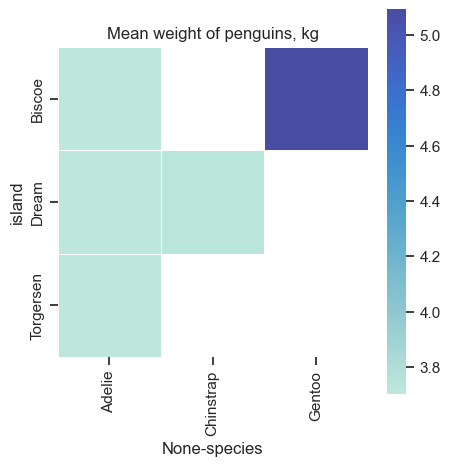

In [ ]:
# Set up the matplotlib figure
figure, axes = plt.subplots(figsize=(5, 10))

# Draw the heatmap
sns.heatmap(
    data=pivot_table/1000,
    center=6,
    square=True,
    linewidths=.5, cbar_kws={"shrink": .5},
    ax = axes,
    #annot=True,
    #cmap="coolwarm", #Spectral)
)

axes.set(title="Mean weight of penguins, kg")
axes.set_xticklabels(penguins_cleaned.species.unique())

Some figure/chart size are fixed, and if you force the figsize to be different - the chart size and shape will stay, but it will create empty part of image. Look at the output of this figure.

In [ ]:
figure.savefig('heatmap_uneven_PNG.png', dpi=300)

### Scatter plot

The scatter plot is used to display the relationship between variables. Let’s see the scatter plot of culmen lengths and depths by penguin species.

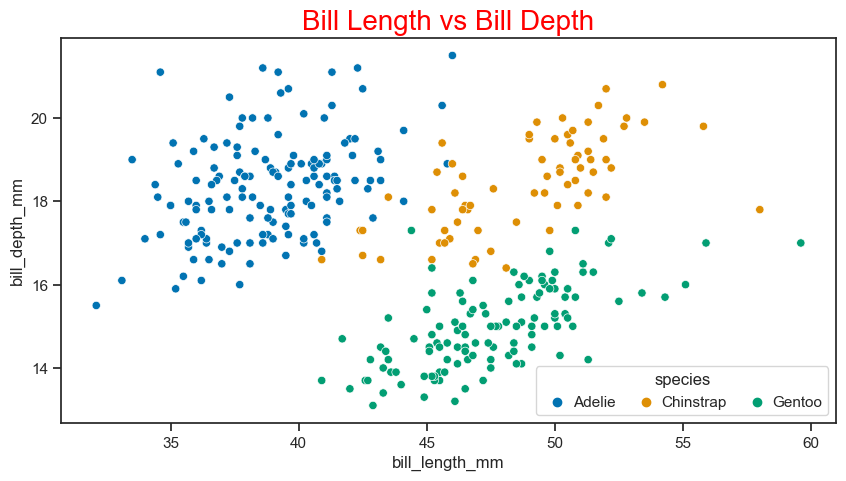

In [ ]:
# Set up the matplotlib figure
figure, axes = plt.subplots(figsize=(10, 5))

# Make a scatterplot
sns.scatterplot(
    data=penguins_cleaned,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    ax = axes
    )
# Give the plot a title
plt.title("Bill Length vs Bill Depth", size=20, color="red") #matplotlib way to define title

# Improve the legend
sns.move_legend(
    obj=axes,
    loc="lower right",
    ncol=3,
    frameon=True,
    columnspacing=1,
    handletextpad=0
)

### Histogram

The histogram plot shows the distribution of the data. You can use the histogram plot to see the distribution of one or more variables. Now let’s see the histogram of the bill length using the histplot function.

Text(0.5, 1.0, 'Bill Length')

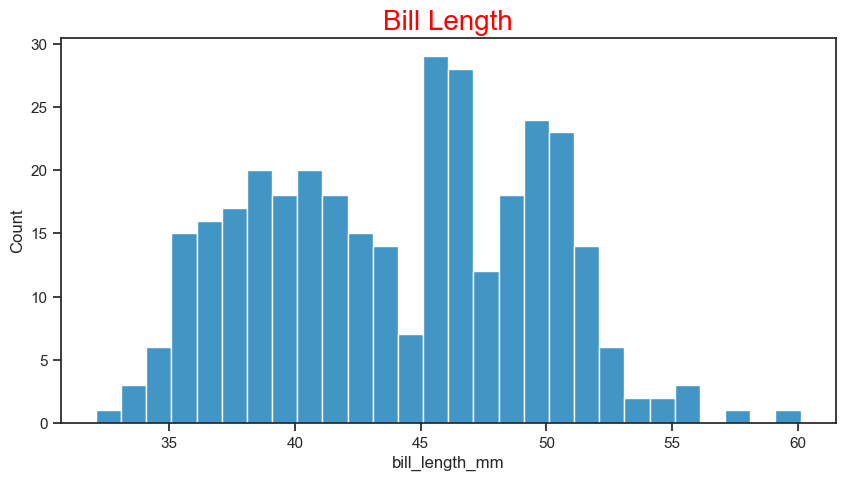

In [ ]:
# Set up the matplotlib figure
figure, axes = plt.subplots(figsize=(10, 5))

sns.histplot(
    data = penguins_cleaned,
    x = "bill_length_mm",
    binwidth=1,
    ax = axes
    )
plt.title("Bill Length", size=20, color="red")

We can display subsets histograms with different colors easily with the same function. We just have to give some additional parameters, like assigning the column 'species' of the dataframe to the `hue` parameter.

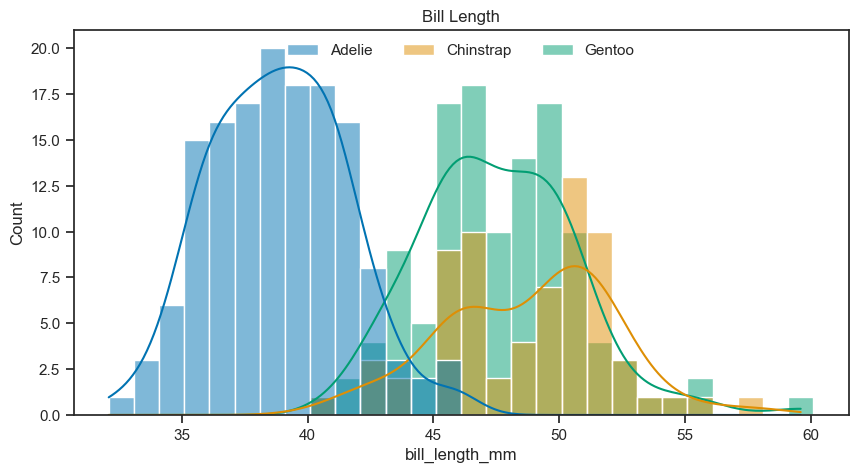

In [ ]:
# Set up the matplotlib figure
figure, axes = plt.subplots(figsize=(10, 5))

sns.histplot(
    data = penguins_cleaned,
    x = "bill_length_mm",
    binwidth = 1,
    hue = "species",
    kde = True,
    ax = axes
    )
axes.set(title="Bill Length")

sns.move_legend(
    axes, "upper center",
    bbox_to_anchor=(.5, 1),
    ncol=3,
    title=None,
    frameon=False,
)

### Bar plot

A bar plot represents **an estimate of the central tendency for a numeric variable** with the height of each rectangle. Let’s see the bar plot showing the bill lengths of penguin species.

[Text(0.5, 1.0, 'Bill Length for 3 Penguin Species by Sex')]

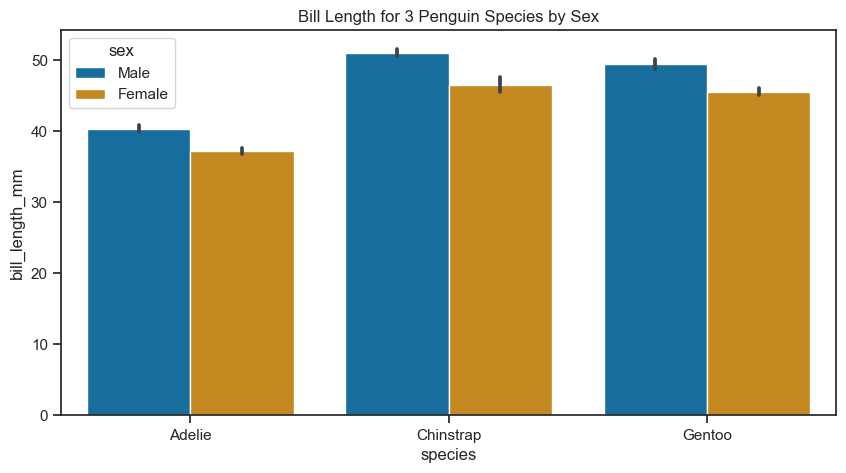

In [ ]:
# Set up the matplotlib figure
figure, axes = plt.subplots(figsize=(10, 5))

sns.barplot(
    data = penguins_cleaned,
    x = "species",
    y = "bill_length_mm",
    hue = "sex",
    ax = axes
    )
axes.set(title="Bill Length for 3 Penguin Species by Sex")

### Box plot

The box plot is used to compare the distribution of numerical data between levels of a categorical variable. Let’s see the distribution of flipper length by species.



[Text(0.5, 1.0, 'Bill Length for 3 Penguin Species')]

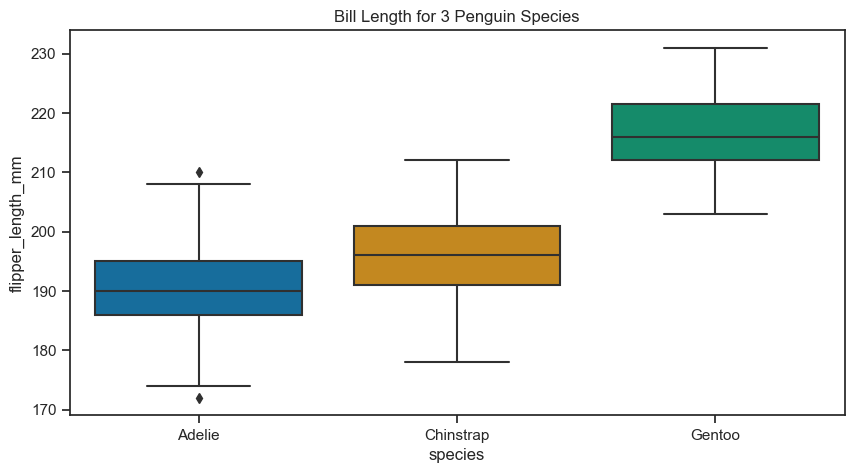

In [ ]:
figure, axes = plt.subplots(figsize=(10, 5))

sns.boxplot(
    data =penguins_cleaned,
    x = "species",
    y = "flipper_length_mm",
    ax = axes
    )
axes.set(title="Bill Length for 3 Penguin Species")

You can use the hue parameter to see a boxplot of flipper lengths of species by sex.

[Text(0.5, 1.0, 'Bill Length for 3 Penguin Species')]

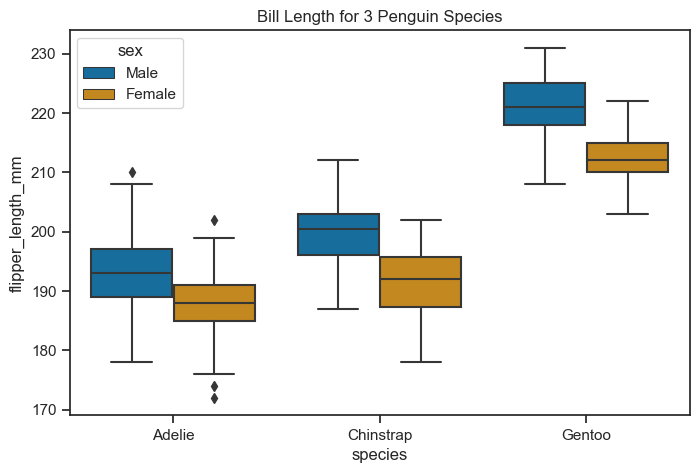

In [ ]:
figure, axes = plt.subplots(figsize=(8, 5))

sns.boxplot(
    data = penguins_cleaned,
    x = "species",
    y = "flipper_length_mm",
    hue="sex",
    ax = axes)
axes.set(title="Bill Length for 3 Penguin Species")

**But** - does the box plot represent the distribution in a best way? [Source](https://blog.bioturing.com/2018/05/16/5-reasons-you-should-use-a-violin-graph/)

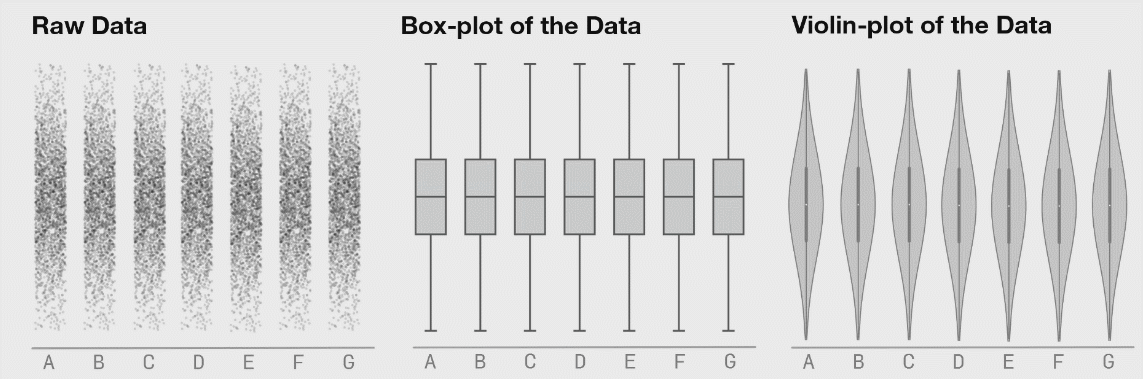

### Violin plot

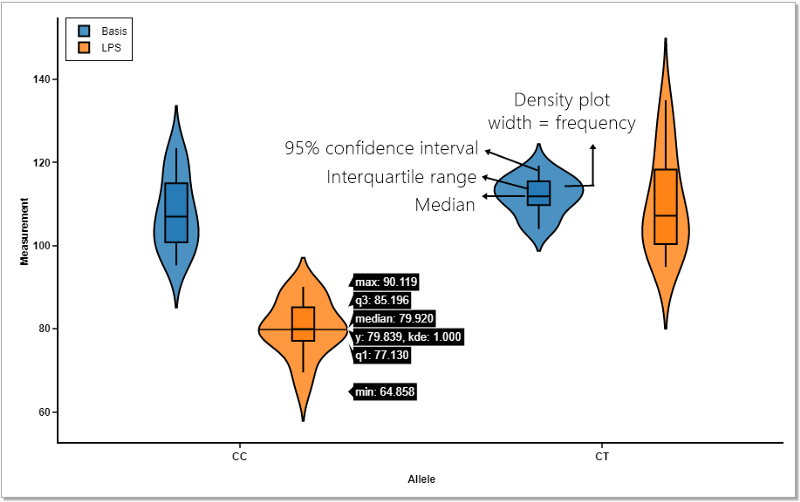

1. Violin graphs are similar to box plots but provide additional benefits.
 * Box plots are widely used to show medians, ranges, and variabilities in different groups.
 * However, box plots can be misleading when the data's distribution changes while maintaining the same summary statistics.
 * Violin plots carry all the information of a box plot but are not affected by changes in data distribution.
2.  Violin graphs combine the advantages of density plots with improved readability.
 * The shape of a violin plot comes from the data's density plot, which is turned sideways and mirrored on both sides of the box plot.
 * The thicker part of the violin represents higher frequency values, while the thinner part represents lower frequency values.
 * Violin plots are preferred over density plots when there are many groups, as overlapping density plots can become difficult to interpret.
3. Violin graphs are visually intuitive and attractive.
 * Different sets are compared by placing their violin plots side by side, avoiding confusion about colors or patterns.
 * Violin plots are easy to read, with the median represented by a dot, the interquartile range by a box, and the 95% confidence interval by whiskers.
 * The shape of the violin displays the frequencies of values, making it visually informative and appealing.
4. Violin graphs are non-parametric and suitable for various data types.
 * Unlike bar graphs with means and error bars, violin plots include all data points.
 * They are useful for visualizing samples with small sizes and work well for both quantitative and qualitative data.
 * Violin plots do not require data to conform to a normal distribution, making them a versatile visualization tool.







<Axes: xlabel='species', ylabel='flipper_length_mm'>

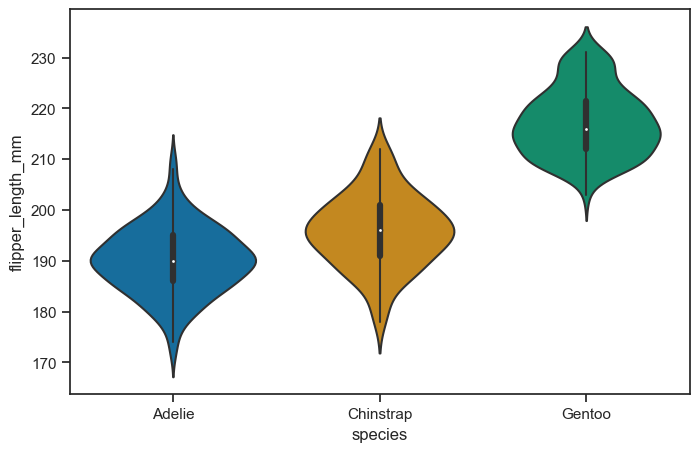

In [ ]:
figure, axes = plt.subplots(figsize=(8, 5))

sns.violinplot(
    data = penguins_cleaned,
    x = "species",
    y = "flipper_length_mm",
    ax = axes
    )

<Axes: xlabel='species', ylabel='flipper_length_mm'>

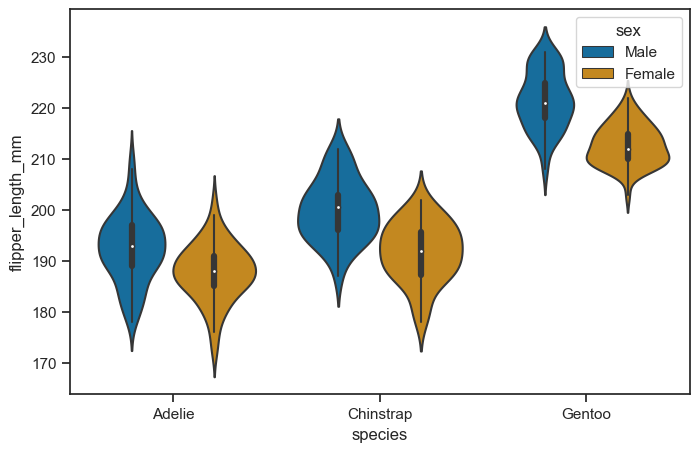

In [ ]:
figure, axes = plt.subplots(figsize=(8, 5))

sns.violinplot(
    data = penguins_cleaned,
    x = "species",
    y = "flipper_length_mm",
    hue = "sex",
    ax = axes
    )

It’s also possible to “split” the violins when the hue parameter has only two levels, which can allow for a more efficient use of space:

<Axes: xlabel='species', ylabel='flipper_length_mm'>

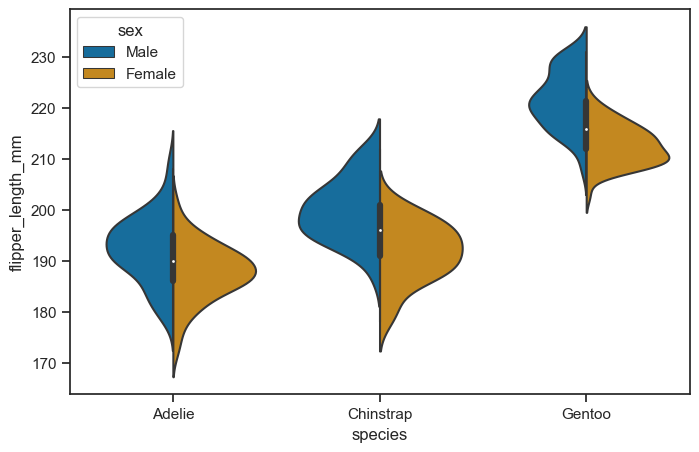

In [ ]:
figure, axes = plt.subplots(figsize=(8, 5))

sns.violinplot(
    data = penguins_cleaned,
    x = "species",
    y = "flipper_length_mm",
    hue = "sex",
    ax = axes,
    split = True,
    )

It can also be useful to combine `swarmplot()` or `stripplot()` with a box plot or violin plot to show each observation along with a summary of the distribution:

<Axes: xlabel='species', ylabel='flipper_length_mm'>

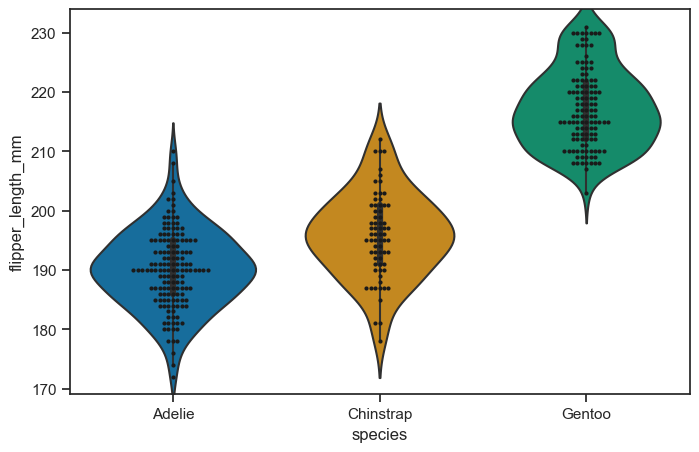

In [ ]:
figure, axes = plt.subplots(figsize=(8, 5))

sns.violinplot(
    data = penguins_cleaned,
    x = "species",
    y = "flipper_length_mm",
    ax = axes,
    )

sns.swarmplot(
    data=penguins_cleaned,
    x="species",
    y="flipper_length_mm",
    color="k",
    size=3,
    ax=axes)

In [ ]:
figure.savefig("swarm_test.png")

Learn more about plotting categorical data [here](https://seaborn.pydata.org/tutorial/categorical.html).

## Other figure-level plots

### Joint Plot

To have a joint distribution of two variables with the marginal distributions on the sides, we can use `jointplot`.

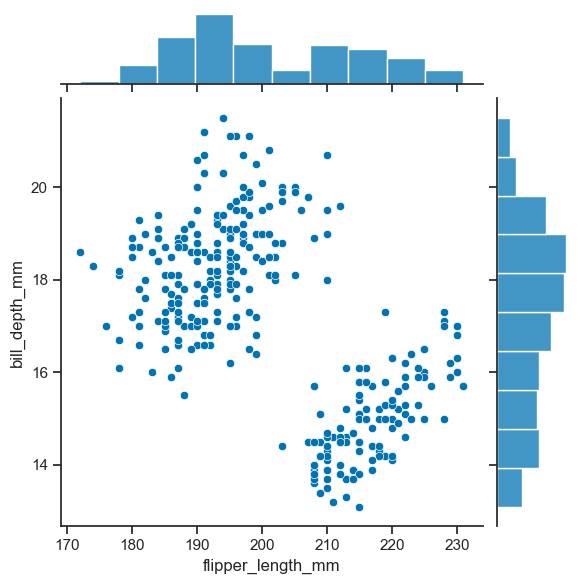

In [ ]:
sns.jointplot(
    data=penguins_cleaned,
    x="flipper_length_mm",
    y="bill_depth_mm"
    )

As expected, it is possible to separate groups by passing a categorical property to the `hue` argument. This has an effect on the marginal distribution, turning them from histogram to kde plots.

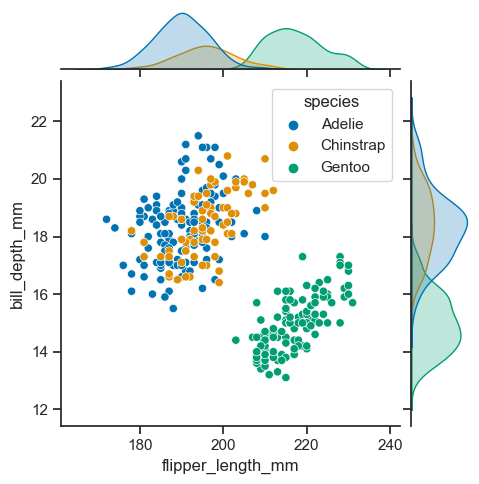

In [ ]:
sns.jointplot(
    data=penguins_cleaned,
    x="flipper_length_mm",
    y="bill_depth_mm",
    hue='species',
    height=5)

### Pair plot

You can use the pairplot method to see the pair relations of the variables. It is perfect for exploring your dataset in fast way. This function creates cross-plots of each numeric variable in the dataset. Let’s see the pairs of numerical variables according to penguin species in the dataset.

c:\Users\mazo260d\mambaforge\envs\devbio-napari-clone\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


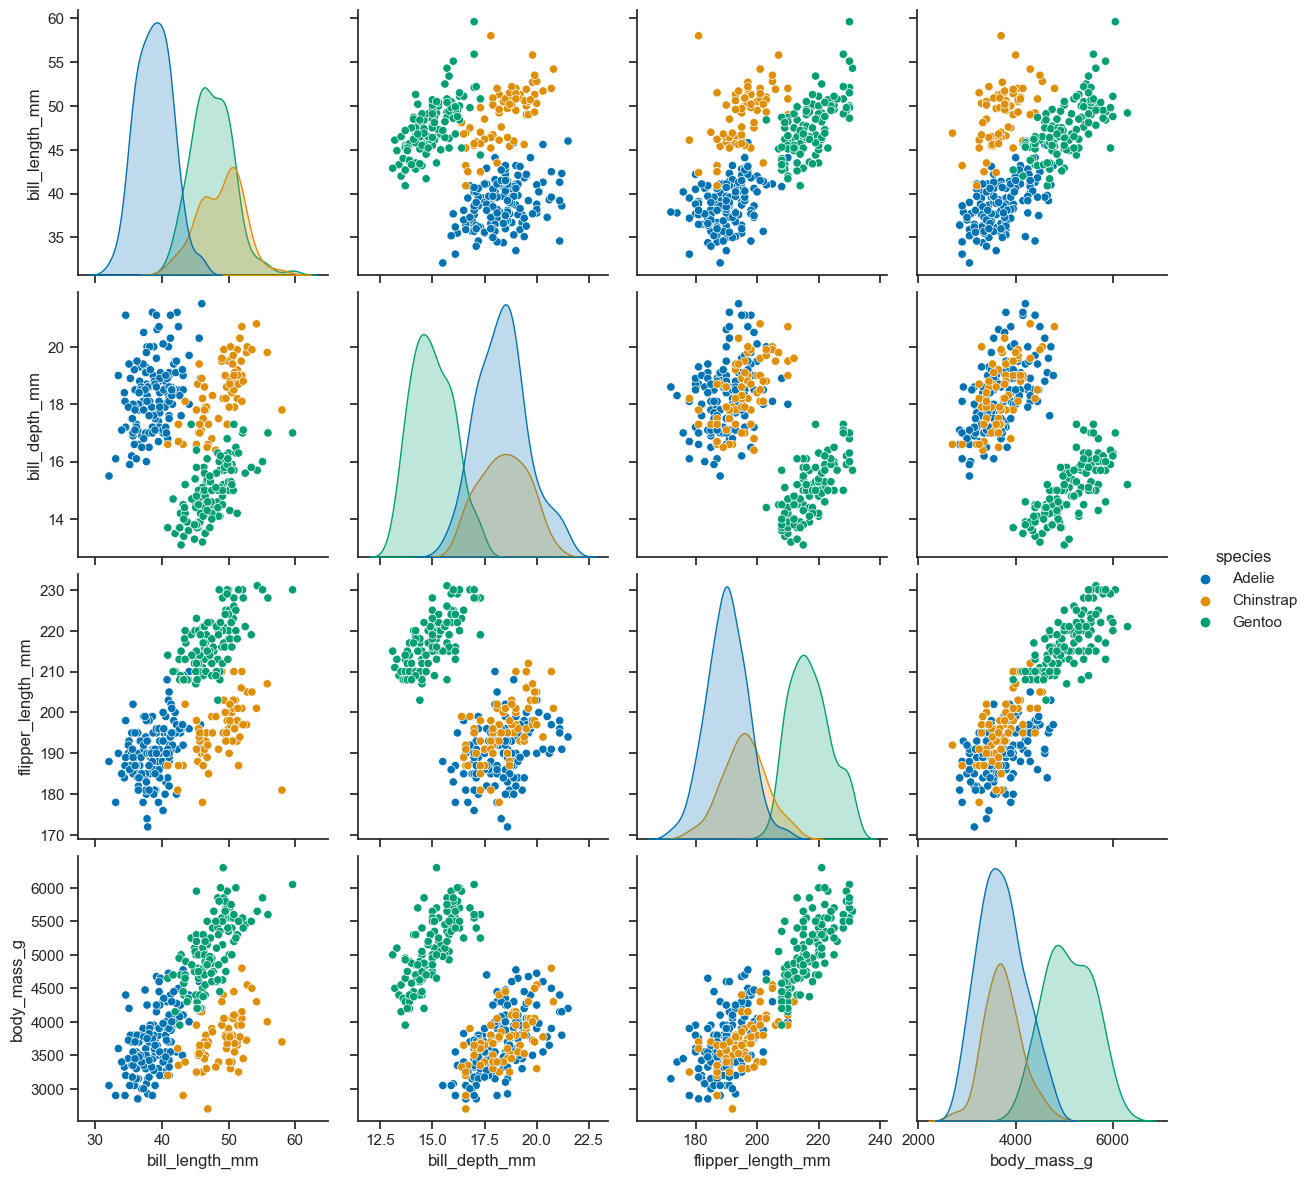

In [ ]:
figure = sns.pairplot(
    data=penguins_cleaned,
    hue = "species",
    height=3
    )

In [ ]:
figure.savefig('pairplot_empty_PNG.png', dpi=300)

If you get empty image, you need to clean previous plots with `matplotlib.pyplot.close()`

In [ ]:
import matplotlib
matplotlib.pyplot.close()

And it should work.

c:\Users\mazo260d\mambaforge\envs\devbio-napari-clone\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


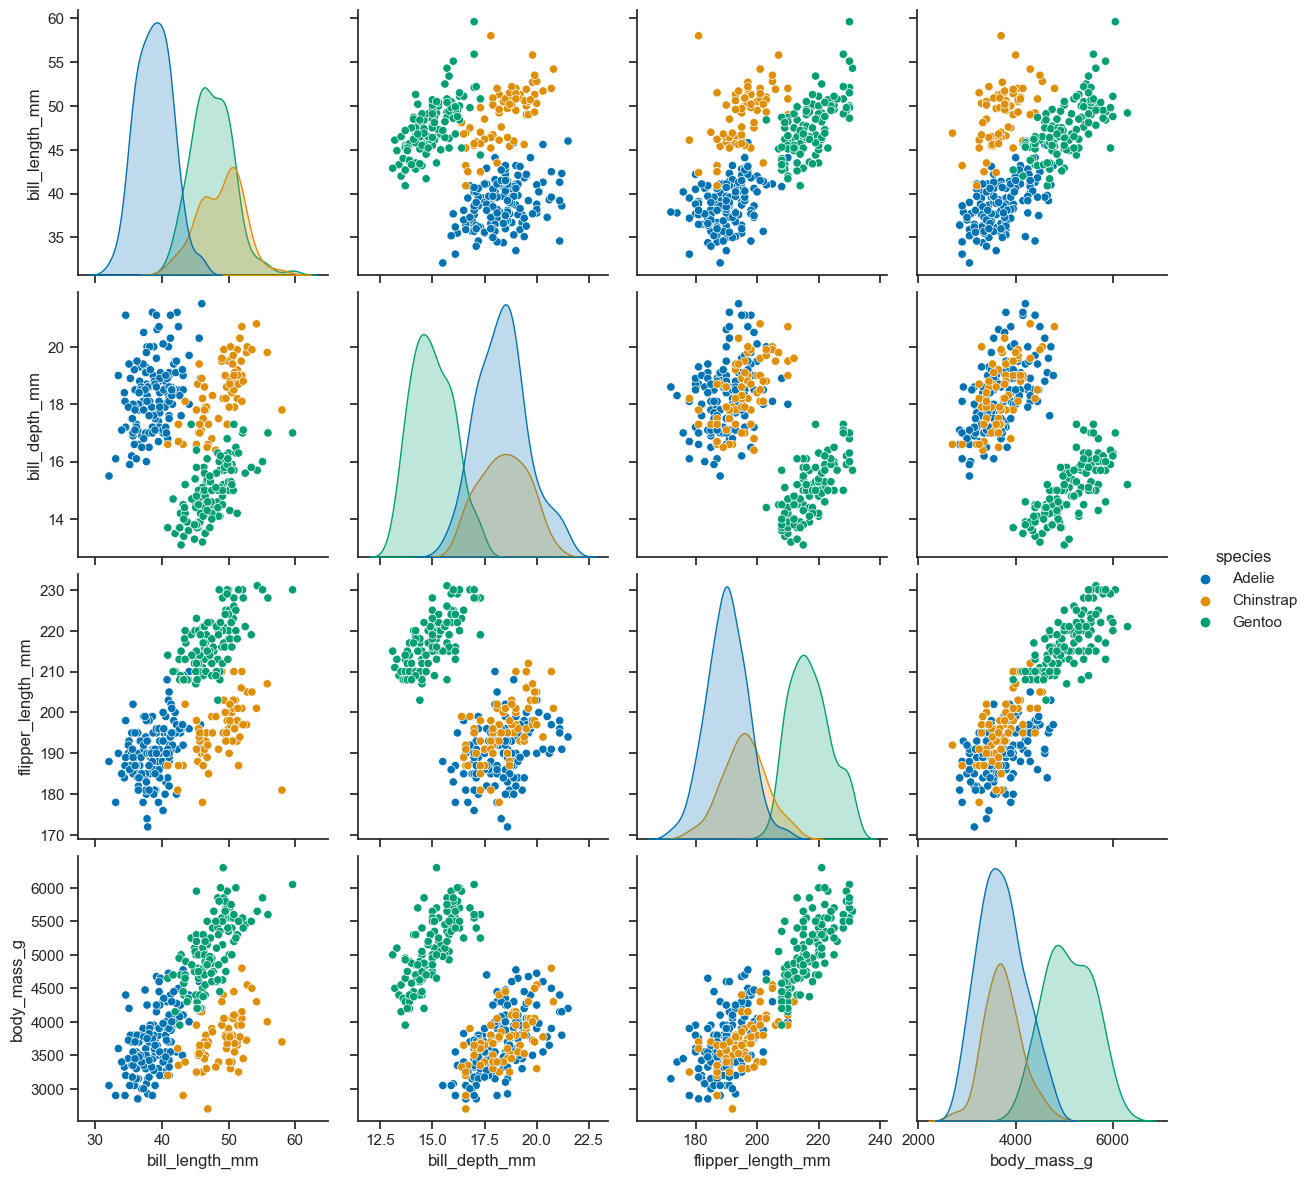

In [ ]:
figure = sns.pairplot(
    data = penguins_cleaned,
    hue = "species",
    height=3
    )

In [ ]:
figure.savefig('pairplot_working_PNG.png', dpi=300)

## Exercise

Use the following images and the corresponding data

In [ ]:
from skimage.io import imread
image1 = imread("../../data/BBBC007_batch/20P1_POS0010_D_1UL.tif")
image2 = imread("../../data/BBBC007_batch/20P1_POS0007_D_1UL.tif")
df = pd.read_csv("../../data/BBBC007_analysis.csv")
data = df[ (df['file_name'] == '20P1_POS0010_D_1UL') | (df['file_name'] == '20P1_POS0007_D_1UL')]
data.head()

area  intensity_mean  major_axis_length  minor_axis_length  aspect_ratio  \
0   139       96.546763          17.504104          10.292770      1.700621   
1   360       86.613889          35.746808          14.983124      2.385805   
2    43       91.488372          12.967884           4.351573      2.980045   
3   140       73.742857          18.940508          10.314404      1.836316   
4   144       89.375000          13.639308          13.458532      1.013432   

            file_name  
0  20P1_POS0010_D_1UL  
1  20P1_POS0010_D_1UL  
2  20P1_POS0010_D_1UL  
3  20P1_POS0010_D_1UL  
4  20P1_POS0010_D_1UL

1. Create figure with two rows and two columns of subplots.
2. Display the two images below in the first row of subplots
3. Display graphs for the corresponding figures on the second row. Choose any axes-level function you like.

---

In [ ]:
from watermark import watermark
watermark(iversions=True, globals_=globals())
print(watermark())
print(watermark(packages="watermark,numpy,pandas,seaborn,matplotlib,scipy"))

Last updated: 2023-08-25T16:39:55.148366+02:00

Python implementation: CPython
Python version       : 3.9.17
IPython version      : 8.14.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
CPU cores   : 16
Architecture: 64bit

watermark : 2.4.3
numpy     : 1.23.5
pandas    : 2.0.3
seaborn   : 0.12.2
matplotlib: 3.7.2
scipy     : 1.11.2

